In [170]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import csv

In [171]:
class Runner:
    def __init__(self, runner_name, runner_last_name, runner_number):
        self.runner_name = runner_name
        self.runner_last_name = runner_last_name
        self.runner_number = runner_number

    @property
    def runner_name(self):
        return self._runner_name

    @runner_name.setter
    def runner_name(self, val):
        if val == "" or not(isinstance(val, str)):
            self._runner_name = "runner_name"
        else:
            self._runner_name = val

    @property
    def runner_last_name(self):
        return self._runner_last_name

    @runner_last_name.setter
    def runner_last_name(self, val):
        if val == "" or not(isinstance(val, str)):
            self._runner_last_name = "runner_last_name"
        else:
            self._runner_last_name = val
    
    @property
    def runner_number(self):
        return self._runner_number
    
    @runner_number.setter
    def runner_number(self, val):
        if not isinstance(val, int):
            raise TypeError('runner_number must be an int')
        self._runner_number = val

    def full_name(self):
        return f'{self.runner_name} {self.runner_last_name}'

    def __str__(self):
        return f'runner name = {self.runner_name}, runner last name = {self.runner_last_name}, runner number = {self.runner_number}'

    def __repr__(self):
        return f'runner_name={self.runner_name}, runner_last_name={self.runner_last_name}, runner_number={self.runner_number}'   

In [172]:
class PaceResult:
    def __init__(self, runner_number, pace_time, pace_number, pace_length):
        self.runner_number = runner_number
        self.pace_time = pace_time
        self.pace_number = pace_number
        self.pace_length = pace_length

    @property
    def runner_number(self):
        return self._runner_number
    
    @runner_number.setter
    def runner_number(self, val):
        if not isinstance(val, int):
            raise TypeError('runner_number must be an int')
        self._runner_number = val

    @property
    def pace_time(self):
        return self._pace_time
    @pace_time.setter
    def pace_time(self, val):
        if not isinstance(val, float):
            raise TypeError('pace_time must be a float')
        self._pace_time = val

    @property
    def pace_length(self):
        return self._pace_length
    @pace_length.setter
    def pace_length(self, val):
        if not isinstance(val, int):
            raise TypeError('pace_length must be an int')
        self._pace_length = val
    
    @property
    def pace_number(self):
        return self._pace_number
    @pace_number.setter
    def pace_number(self, val):
        if not isinstance(val, int):
            raise TypeError('pace_number must be an int')
        self._pace_number = val

    def __str__(self):
        return f'runner number = {self.runner_number}, pace time = {self.pace_time}, pace number = {self.pace_number}, pace length = {self.pace_length}'

    def __repr__(self):
        return f'runner_number = {self.runner_number}, pace_time = {self.pace_time}, pace_number = {self.pace_number}, pace_length = {self.pace_length}'

In [173]:
runner_data = {}
with open('runners.csv', 'r') as rn:
    reader = csv.reader(rn)
    next(reader)
    for row in reader:
        runner_data.update({row[0]: Runner(row[0], row[1], int(row[2]))})

for i in runner_data:
    print(runner_data[i])

runner name = Jacobi, runner last name = Hammes, runner number = 1
runner name = Renner, runner last name = Conner, runner number = 2
runner name = Turcotte, runner last name = Nolan, runner number = 3
runner name = Gottlieb, runner last name = Lueilwitz, runner number = 4
runner name = Jones, runner last name = Rodriguez, runner number = 5


In [174]:
result_data = {}
with open('results.csv', 'r') as rn:
    reader = csv.reader(rn)
    next(reader)
    for row in reader:
        if row[2] not in result_data:
            result_data.update({row[2]: [PaceResult(int(row[0]), float(row[1]), int(row[2]), int(row[3]))]})
        else:
            result_data[row[2]].append(PaceResult(int(row[0]), float(row[1]), int(row[2]), int(row[3])))

for i in result_data.keys():
    result_data[i] = sorted(result_data[i], key=lambda item: item.pace_time)

for i in result_data:
    print('\n')
    print('Pace', i)
    for u in result_data[i]:
        print(' ', u)



Pace 1
  runner number = 3, pace time = 17.42, pace number = 1, pace length = 12
  runner number = 1, pace time = 22.48, pace number = 1, pace length = 12
  runner number = 4, pace time = 24.65, pace number = 1, pace length = 12
  runner number = 2, pace time = 28.67, pace number = 1, pace length = 12
  runner number = 5, pace time = 42.69, pace number = 1, pace length = 12


Pace 2
  runner number = 4, pace time = 49.19, pace number = 2, pace length = 16
  runner number = 5, pace time = 49.8, pace number = 2, pace length = 16
  runner number = 1, pace time = 54.2, pace number = 2, pace length = 16
  runner number = 3, pace time = 57.28, pace number = 2, pace length = 16
  runner number = 2, pace time = 68.86, pace number = 2, pace length = 16


Pace 3
  runner number = 4, pace time = 67.21, pace number = 3, pace length = 8
  runner number = 5, pace time = 69.8, pace number = 3, pace length = 8
  runner number = 1, pace time = 80.95, pace number = 3, pace length = 8
  runner number =

### Task 1 and 1a

In [184]:
def f(pace):
    leaders = []
    for i in result_data[str(pace[0].pace_number)]:
        for u in runner_data.values():
            if i.runner_number == u.runner_number:
                leaders.append([u.full_name(), u.runner_number])

    for i in range(0, 3):
        print(leaders[i][0])

    x = [x for x in result_data]
    x.insert(0, 0)
    y = {0: [0,0,0]}
    for r in range(0, 3):
        for i in result_data:
            for u in result_data[i]:
                if (u.runner_number == leaders[r][1]):
                    if u.pace_number not in y:
                        y.update({u.pace_number: [u.pace_time]})
                    else:
                        y[u.pace_number].append(u.pace_time)

    for i in y:
        if len(y[i]) != 3:
            while len(y[i]) != 3:
                y[i].append(0)

    t_keys = list(y.keys())
    labels = []
    for i in t_keys:
        for u in runner_data:
            if i == runner_data[u].runner_number:
                labels.append(runner_data[u].full_name())
    t_values = list(y.values())
    
    fig, ax = plt.subplots(figsize=(20, 10));
    ax.plot(t_keys, t_values)
    plt.legend(labels)
    plt.xticks(np.arange(int(x[0]), int(x[-1])+1, 1))
    ax.set(xlabel='pace', ylabel='time (mins)', title='Diagram of bests on that pace')
    ax.grid()
    plt.show();

interact(f, pace=result_data);

interactive(children=(Dropdown(description='pace', options={'1': [runner_number = 3, pace_time = 17.42, pace_n…

### Task 2 and 2a

In [181]:
leaders = []
for i in result_data[list(result_data.keys())[-1]]:
    for u in runner_data:
        if runner_data[u].runner_number == i.runner_number:
            leaders.append([runner_data[u].full_name(), runner_data[u].runner_number])
            print('runner:', runner_data[u].full_name(), 'time:',i.pace_time)



runner: Turcotte Nolan time: 148.51
runner: Gottlieb Lueilwitz time: 149.9
runner: Jacobi Hammes time: 150.54


### Task 3

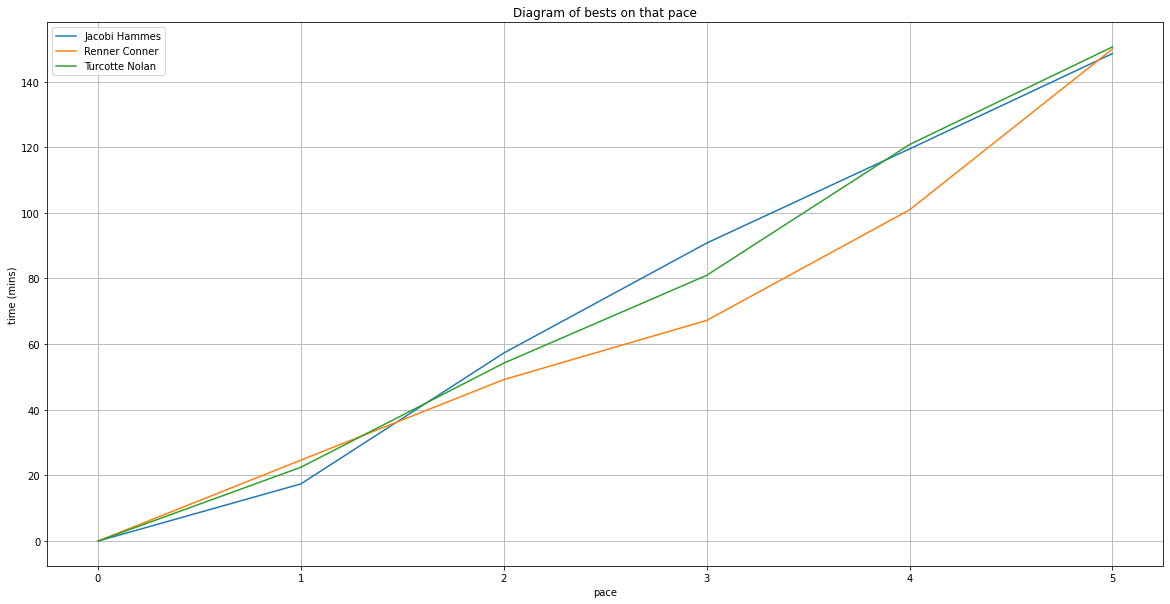

In [229]:
x = [x for x in result_data]
x.insert(0, '0')
y = {0: [0,0,0]}
for r in range(0, 3):
    for i in result_data:
        for u in result_data[i]:
            if (u.runner_number == leaders[r][1]):
                if u.pace_number not in y:
                    y.update({u.pace_number: [u.pace_time]})
                else:
                    y[u.pace_number].append(u.pace_time)

t_keys = list(y.keys())
labels = []
for i in t_keys:
    for u in runner_data:
        if i == runner_data[u].runner_number:
            labels.append(runner_data[u].full_name())
t_values = list(y.values())

fig, ax = plt.subplots(figsize=(20, 10));
ax.plot(t_keys, t_values)
plt.legend(labels)
plt.xticks(np.arange(int(x[0]), int(x[-1])+1, 1))
ax.set(xlabel='pace', ylabel='time (mins)', title='Diagram of bests on that pace')
ax.grid()
plt.show();

### Task 3 and 3a

In [214]:
route_length = 0
route_length_for_every_pace = []
for i in result_data:
    route_length += result_data[i][0].pace_length
    if i == '1':
        route_length_for_every_pace.append(result_data[i][0].pace_length)
    else:
        t = 1
        summary = 0
        while t != int(i)+1:
            summary += result_data[str(t)][0].pace_length
            t += 1
        route_length_for_every_pace.append(summary)
print(f'route length: {route_length} km')
print(route_length_for_every_pace)

route length: 65 km
[12, 28, 36, 46, 65]


In [223]:
average = {}
for i in result_data:
    for u in result_data[i]:
        if u.runner_number not in average:
            average.update({u.runner_number: [int(round(route_length_for_every_pace[int(i)-1]/u.pace_time, 2)*1000)]})
        else:
            average[u.runner_number].append(int(round(route_length_for_every_pace[int(i)-1]/u.pace_time, 2)*1000))

for i in sorted(average):
    print('runner id:',i, 'and his best average speed was:', min(average[i]), 'm/min which was achieved on stage:', np.argmin(average[i])+1)

runner id: 1 and his best average speed was: 380 m/min which was achieved on stage: 4
runner id: 2 and his best average speed was: 410 m/min which was achieved on stage: 2
runner id: 3 and his best average speed was: 390 m/min which was achieved on stage: 4
runner id: 4 and his best average speed was: 430 m/min which was achieved on stage: 5
runner id: 5 and his best average speed was: 280 m/min which was achieved on stage: 1


In [263]:
speeds = {}
for r in runner_data:
    for i in result_data:
        for u in result_data[i]:
            if runner_data[r].runner_number == u.runner_number:
                if runner_data[r].full_name() not in speeds:
                    speeds.update({runner_data[r].full_name(): [round(u.pace_length/u.pace_time, 2)*1000]})
                else:
                    speeds[runner_data[r].full_name()].append(round(u.pace_length/u.pace_time, 2)*1000)

for i in speeds:
        if len(speeds[i]) != 5:
            while len(speeds[i]) != 5:
                speeds[i].append(0)

def g(runner):
    t_lab = list(speeds.keys())
    t_y = list(speeds[runner])
    plt.figure(figsize=(20, 10))
    plt.grid()
    plt.plot(x[1:], t_y)
    plt.show()

interact(g, runner=sorted(speeds));

interactive(children=(Dropdown(description='runner', options=('Gottlieb Lueilwitz', 'Jacobi Hammes', 'Jones Ro…